In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style='darkgrid')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,7)
plt.rcParams['figure.dpi'] = (150)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [39]:
df=pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Logistic%20Regression/bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [40]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [42]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [43]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [44]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [45]:
oe=OrdinalEncoder()

In [56]:
encoding=df.iloc[0:,0:-1]
encoding

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [59]:
cat_df = df.select_dtypes(object).columns
cat_df


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [60]:
oe  = OrdinalEncoder()

In [63]:
df[cat_df]=oe.fit_transform(df[cat_df])

In [65]:
df[cat_df]

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
1,9.0,2.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
2,2.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0,0.0
3,1.0,1.0,3.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
4,11.0,2.0,3.0,0.0,0.0,0.0,2.0,8.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
45206,9.0,1.0,2.0,0.0,0.0,0.0,0.0,9.0,3.0,1.0
45207,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,1.0
45208,5.0,1.0,1.0,0.0,0.0,0.0,0.0,9.0,2.0,1.0
45209,1.0,1.0,1.0,0.0,0.0,0.0,1.0,9.0,3.0,0.0


In [67]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0.0


In [71]:
x=df.iloc[0:,0:-1]
y=df['y']

In [73]:
from sklearn.model_selection import train_test_split

In [78]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [80]:
lr=LogisticRegression()

In [82]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [87]:
ypred=lr.predict(xtest)

In [88]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7993
         1.0       0.55      0.18      0.27      1050

    accuracy                           0.89      9043
   macro avg       0.72      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [91]:
proba=lr.predict_proba(xtest)[:,1]

In [92]:
proba

array([0.02765195, 0.05857307, 0.3766117 , ..., 0.04030251, 0.00120276,
       0.08418483])

In [94]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

In [96]:
auc=roc_auc_score(ytest,proba)

In [99]:
fpr,tpr,threshold=roc_curve(ytest,proba)


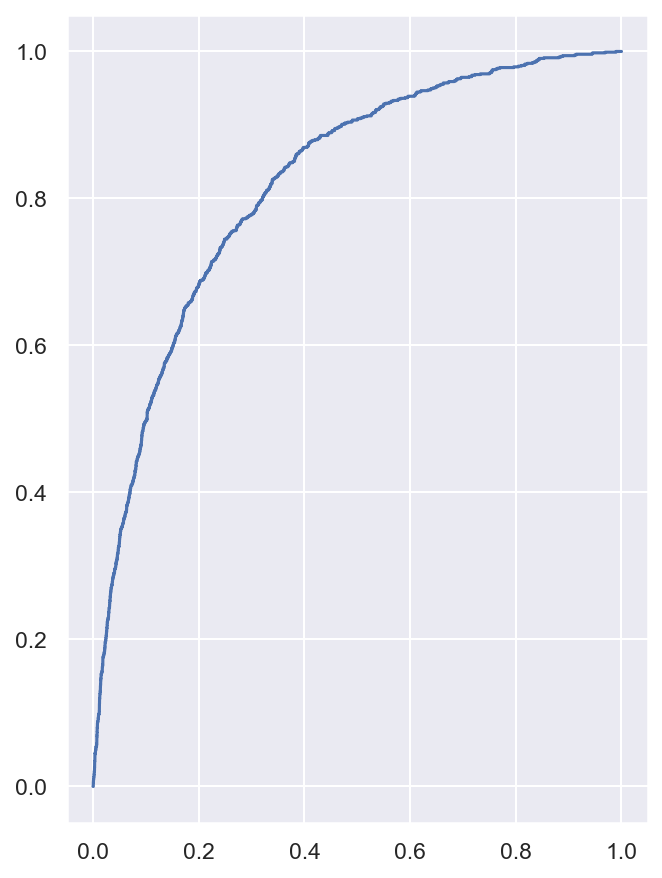

In [100]:
plt.plot(fpr,tpr)

In [102]:
auc

0.8193873210487749

In [103]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [104]:
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
144,5.477049e-01,0.888090
143,5.483959e-01,0.888090
145,5.475932e-01,0.887980
134,5.634997e-01,0.887869
140,5.568454e-01,0.887869
...,...,...
1520,4.140580e-03,0.143315
1521,4.138911e-03,0.143205
1522,5.057441e-04,0.125290
1523,5.011171e-04,0.125180


In [106]:
from sklearn.preprocessing import binarize

In [108]:
y = binarize([proba], threshold=0.442068)[0]
y

array([0., 0., 0., ..., 0., 0., 0.])

In [109]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94      7993
         1.0       0.52      0.22      0.31      1050

    accuracy                           0.89      9043
   macro avg       0.71      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043

